### Name: Erfan Jafari
### StudentId: 400104891

# Librarires

In [1]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [3]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit(self, X):
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])
        self.centroids = X[random_indices[:self.n_clusters]]

        for i in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = self._compute_centroids(X, clusters)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
    
    def predict(self, X):
        return self._assign_clusters(X)
    
    def _assign_clusters(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)
    
    def _compute_centroids(self, X, clusters):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[clusters == k]
            centroids[k] = cluster_points.mean(axis=0)
        return centroids
    
    def _compute_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_diff = X - self.centroids[k]
            distances[:, k] = np.linalg.norm(row_diff, axis=1)
        return distances


# Use elbow method and silhouette method to choose optimal cluster numbers

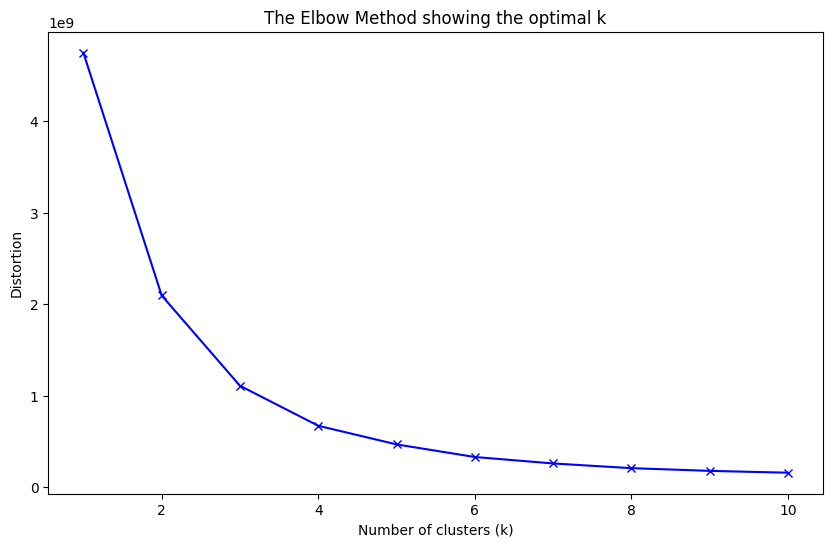

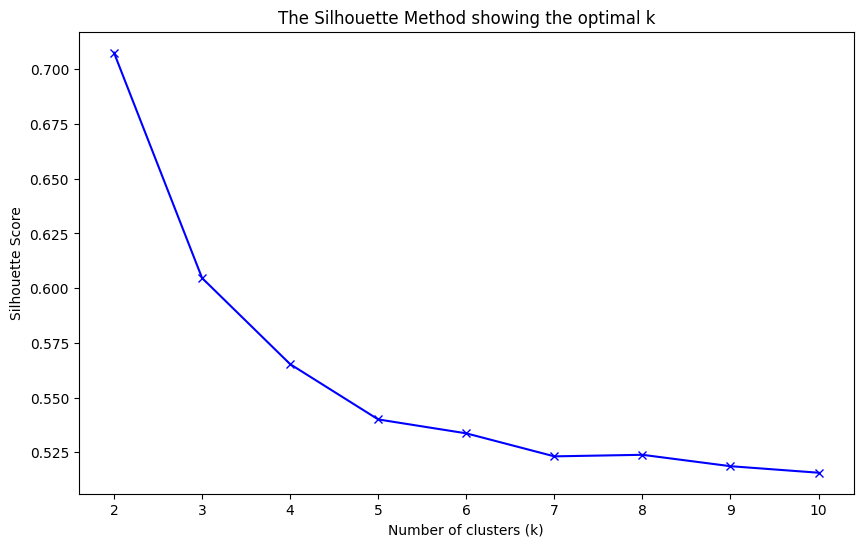

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


def plot_elbow_method(x_data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, max_iter=300)
        kmeans.fit(x_data)
        distortion = np.sum((x_data - kmeans.centroids[kmeans.predict(x_data)]) ** 2)
        distortions.append(distortion)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

def plot_silhouette_method(x_data, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, max_iter=300)
        kmeans.fit(x_data)
        cluster_labels = kmeans.predict(x_data)
        silhouette_avg = silhouette_score(x_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.show()

plot_elbow_method(x_data)
plot_silhouette_method(x_data)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

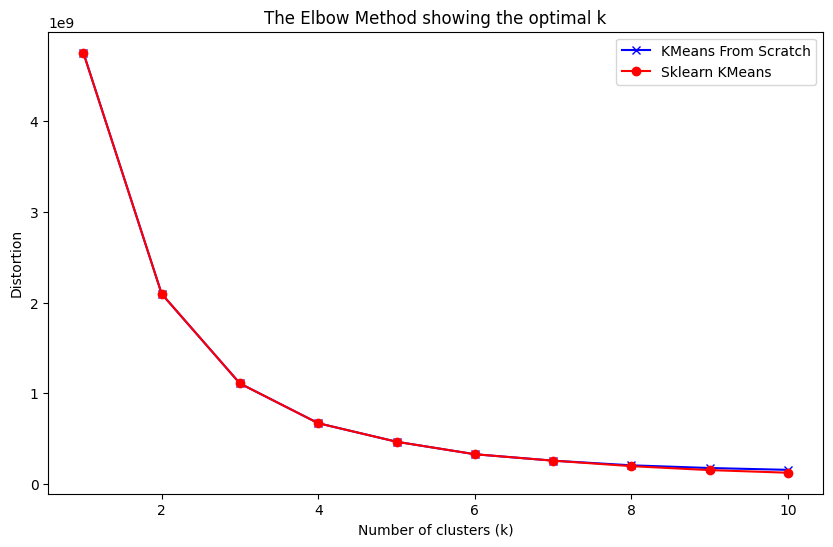

c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

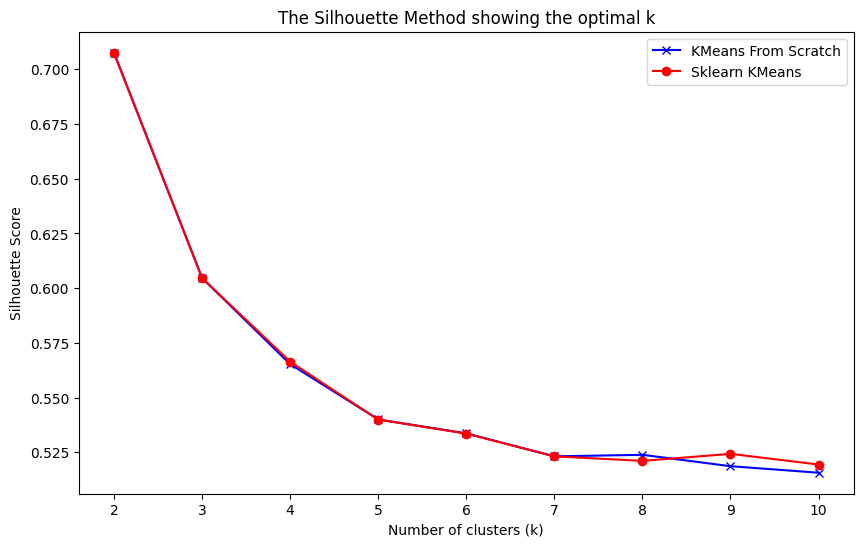

In [5]:
from sklearn.cluster import KMeans as SklearnKMeans

def plot_elbow_method(x_data, max_k=10):
    distortions_ours = []
    distortions_sklearn = []
    for k in range(1, max_k + 1):
        kmeans_ours = KMeans(n_clusters=k, max_iter=300)
        kmeans_ours.fit(x_data)
        distortion_ours = np.sum((x_data - kmeans_ours.centroids[kmeans_ours.predict(x_data)]) ** 2)
        distortions_ours.append(distortion_ours)

        kmeans_sklearn = SklearnKMeans(n_clusters=k, max_iter=300, random_state=42)
        kmeans_sklearn.fit(x_data)
        distortions_sklearn.append(kmeans_sklearn.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), distortions_ours, 'bx-', label='KMeans From Scratch')
    plt.plot(range(1, max_k + 1), distortions_sklearn, 'ro-', label='Sklearn KMeans')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.legend()
    plt.show()

def plot_silhouette_method(x_data, max_k=10):
    silhouette_scores_ours = []
    silhouette_scores_sklearn = []
    for k in range(2, max_k + 1):
        kmeans_ours = KMeans(n_clusters=k, max_iter=300)
        kmeans_ours.fit(x_data)
        cluster_labels_ours = kmeans_ours.predict(x_data)
        silhouette_avg_ours = silhouette_score(x_data, cluster_labels_ours)
        silhouette_scores_ours.append(silhouette_avg_ours)

        kmeans_sklearn = SklearnKMeans(n_clusters=k, max_iter=300, random_state=42)
        kmeans_sklearn.fit(x_data)
        cluster_labels_sklearn = kmeans_sklearn.labels_
        silhouette_avg_sklearn = silhouette_score(x_data, cluster_labels_sklearn)
        silhouette_scores_sklearn.append(silhouette_avg_sklearn)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores_ours, 'bx-', label='KMeans From Scratch')
    plt.plot(range(2, max_k + 1), silhouette_scores_sklearn, 'ro-', label='Sklearn KMeans')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.legend()
    plt.show()

plot_elbow_method(x_data)
plot_silhouette_method(x_data)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference
By default, scikit-learn uses the "k-means++" initialization method, which spreads out the initial centroids to improve convergence and the final result. It also uses highly optimized numerical routines, ensuring consistency and stability.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method
The Elbow method is simple but subjective in finding the optimal cluster number, while the Silhouette method offers a clear, objective score by assessing both cluster cohesion and separation, making it generally more reliable and preferable.